In [1]:
import os
os.chdir("../..")
from models.train import evaluate, prepare_plot_2d
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from data.image_dataloader import ImageDataProcessor
from models.cnp import CNPModel
from utils import plot_2d_np_results


/home/thomas/miniconda3/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


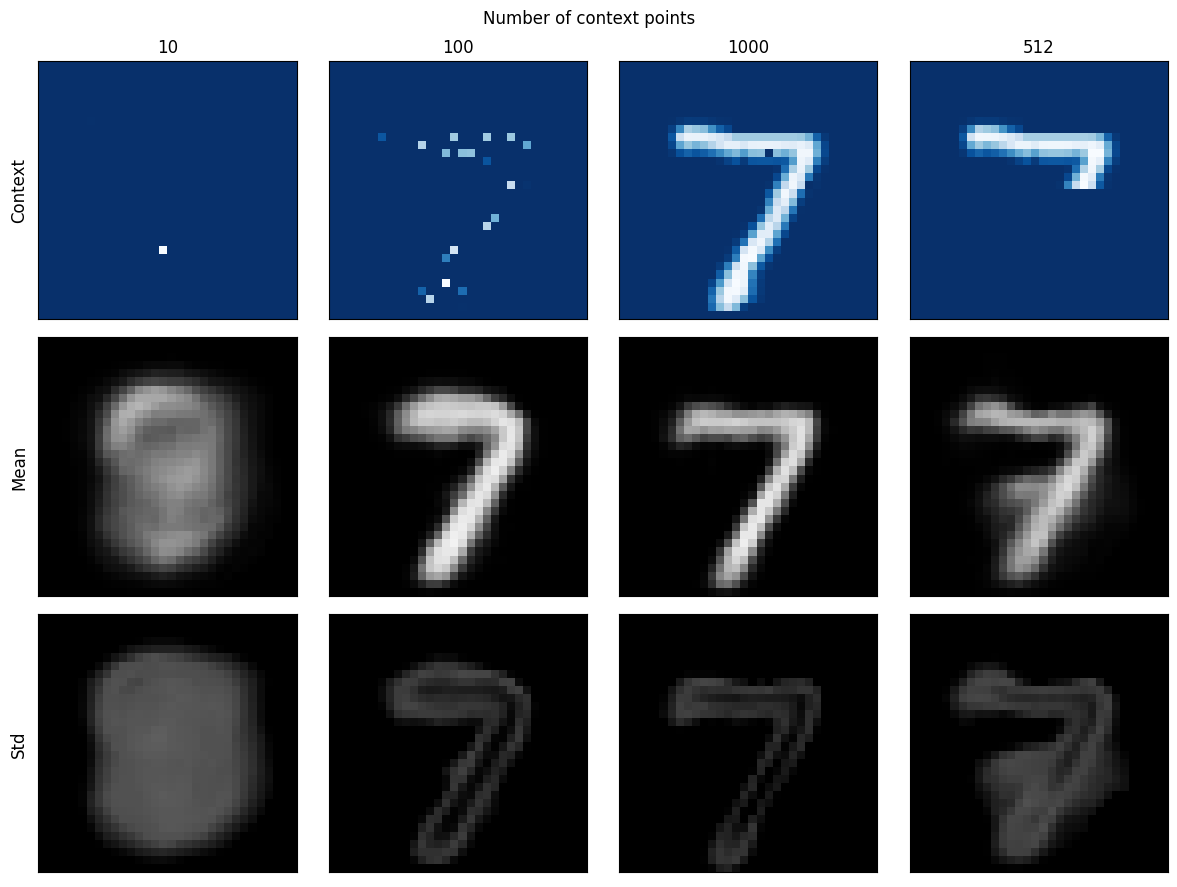

In [2]:
img_size = 32

# MNIST
pre_process = transforms.Compose([transforms.Resize(img_size), transforms.ToTensor()])
test_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=pre_process)
test_loader = DataLoader(dataset=test_mnist, shuffle=False, batch_size=1)
y_dim = 1

img_processor = ImageDataProcessor(testing=True)
iterator = iter(test_loader)
img_batch = next(iterator)[0]

# CNP
cnp_model = CNPModel(x_dim=2, y_dim=y_dim)


checkpoint = torch.load("model_epoch_200.pt")
cnp_model.load_state_dict(checkpoint["model_state_dict"] if type(checkpoint) == dict else checkpoint)
cnp_model.to("cpu")
cnp_model.eval()

sample_image_batch, _ = next(iter(test_loader))
data = []
for n_context in [10, 100, 1000, "top half"]:
    test_input, _ = img_processor.process_batch(
        sample_image_batch, test_context=n_context, model_type="cnp"
    )
    eval_result = evaluate(cnp_model, test_input, "cpu")
    data.append(
        prepare_plot_2d(eval_result) + (sample_image_batch.shape[2],)
    )
plot_2d_np_results(data, model_type="cnp")